# Goal:   set parameters to define box around peaks during wire scan

args = {'max_size' : 100,
        'min_size' : 3,
        'thr': 20,
        'erode': 2,
        'dilate': 3}

mask, bkg = seg.apply_threshold(I, **args)

In [1]:
#----------- global imports -----------
import os, sys
import matplotlib as mpl
import matplotlib.pylab as mplp
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#----------- daxm imports -----------
from LaueTools.Daxm.classes.scan import new_scan
from LaueTools.Daxm.classes.source import new_source
from LaueTools.Daxm.classes.calibration import CalibManager
from LaueTools.Daxm.classes.reconstruction import SpotReconstructor
from LaueTools.Daxm.modules import segmentation2 as seg

Missing library libtiff, Please install: pylibtiff if you need open some tiff images. However, Fabio or PIL can do the job!
location photutils <module 'photutils' from '/home/micha/anaconda3/envs/py38NN/lib/python3.8/site-packages/photutils/__init__.py'>


In [3]:
if 0: # to know which LaueTools is called
    import LaueTools
    print('LaueTools',LaueTools)

In [4]:
#----------- all directories -----------
analysis_dir = "/home/micha/LaueProjects/DAXMSept21/GeDAXM"
calib_dir = os.path.join(analysis_dir, "calibration")
recdir = os.path.join(analysis_dir, "reconstruction")
prefix = "GeDAXM"

In [5]:
#----------- scan and calib -----------
scan = new_scan(os.path.join(analysis_dir, prefix+"_calib.scan"))
scan.set_verbosity(False)

"scan_inp" scan input dict /home/micha/LaueProjects/DAXMSept21/GeDAXM/GeDAXM_calib.scan
/home/micha/LaueProjects/DAXMSept21/GeDAXM/GeDAXM_calib.scan 
#######     read .scan file  ############
"scan_inp" scan input dict {'type': 'point', 'size': 0, 'skipFrame': 0, 'lineSubFolder': False, 'specFile': '/home/micha/LaueProjects/DAXMSept21/laue.01Sep21', 'scanNumber': 28, 'hdf5scanId': '', 'scanCmd': [1.3, 2.0, 700, 0.9], 'CCDType': 'sCMOS', 'detCalib': '/home/micha/LaueProjects/DAXMSept21/GeDAXM/calibGe001.det', 'wire': [['W', 0.025, 0.94, 2.1399999999999997], ['W', 0.025, 1.2, 1.59], ['W', 0.025, 0.9, 1.05]], 'wireTrajAngle': 0.0, 'imageFolder': '/home/micha/LaueProjects/DAXMSept21/GeDAXM', 'imagePrefix': 'GeDAXM_', 'imageFirstIndex': 0, 'imageDigits': 4, 'imageOffset': 0.0, 'monitor': 'spec', 'monitorROI': [], 'monitorOffset': 13}
[scan] Creating class instance...
Creating class instance... (init StaticPointScan)
input "inp" {'type': 'point', 'size': 0, 'skipFrame': 0, 'lineSubFolder': F

<IPython.core.display.Javascript object>


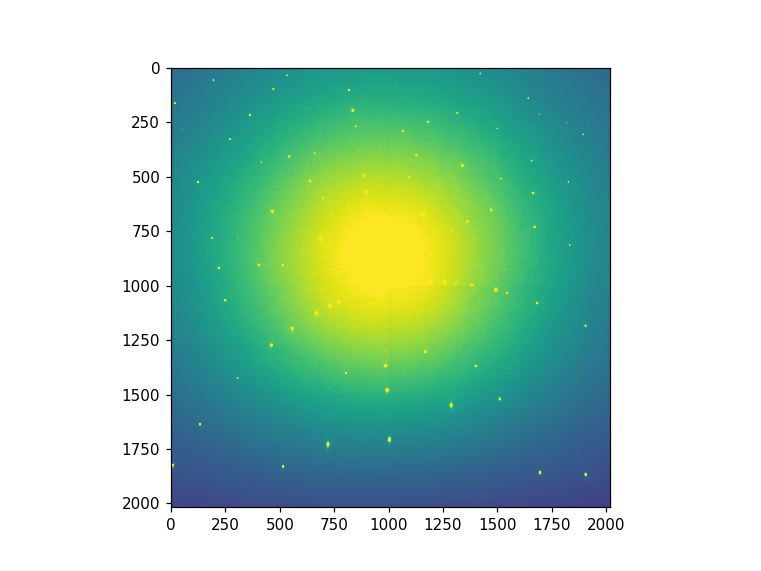

In [6]:
%matplotlib notebook

#scan.goto_centre()
#----------- Initial image -----------
#I = scan.get_images_tophat(step=10, iy=7)

# stack of images (very 10 images)
I = scan.get_images_tophat(step=10)


mplp.figure()
mplp.imshow(I.transpose(), vmin=900, vmax=1500)

In [7]:
args = {'max_size' : 100,
        'min_size' : 3,
        'thr': 20,
        'erode': 2,
        'dilate': 3}

mask, bkg = seg.apply_threshold(I, **args)

<IPython.core.display.Javascript object>


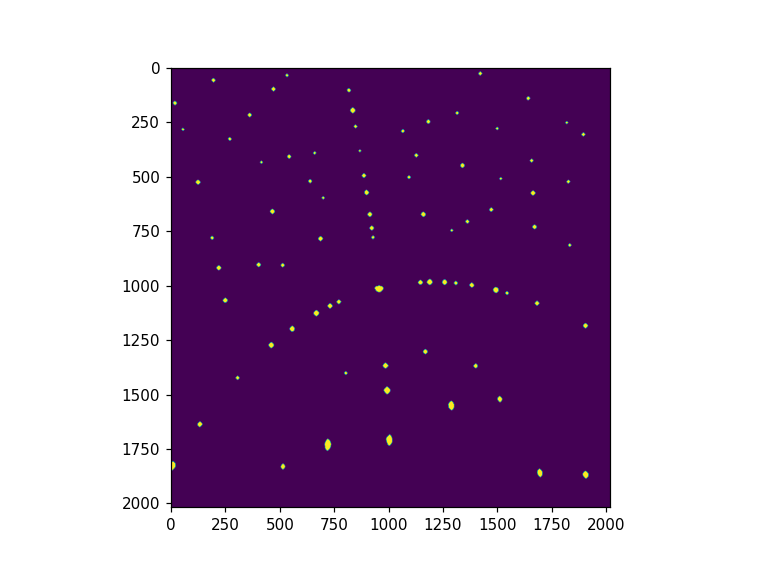

<IPython.core.display.Javascript object>


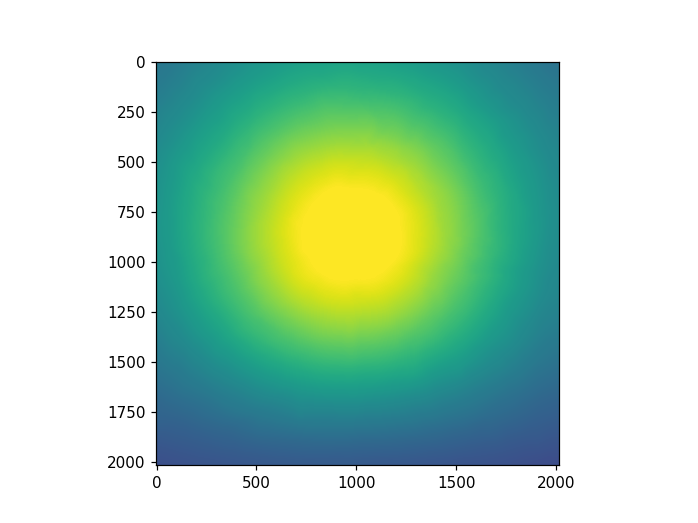

In [8]:
mplp.figure()
mplp.imshow( mask.transpose())

mplp.figure()
mplp.imshow( bkg.transpose(), vmin=900, vmax=1500)

<IPython.core.display.Javascript object>


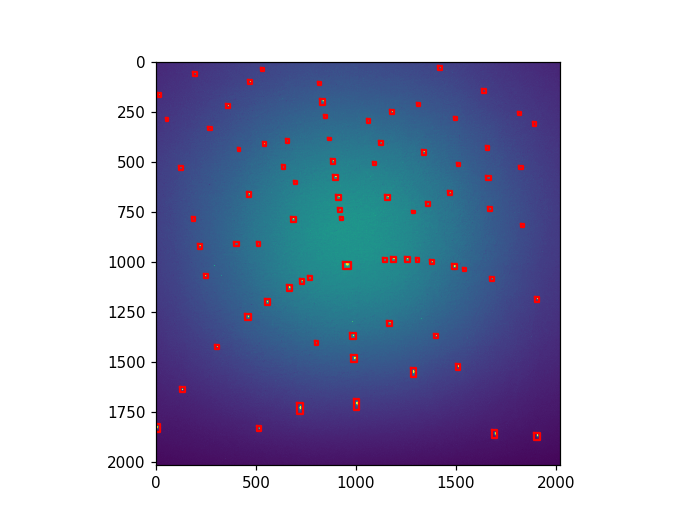

(2016, 0)

In [11]:
peaks_xy, peaks_hbs = seg.draw_bbox(I, mask, False)


mplp.figure()
mplp.imshow(I.transpose(), vmin=1000, vmax=2000)
for xy, hbs in zip(peaks_xy, peaks_hbs):
    mplp.plot([xy[0]-hbs[0],  xy[0]+hbs[0], xy[0]+hbs[0], xy[0]-hbs[0], xy[0]-hbs[0]],
              [xy[1] - hbs[1], xy[1] - hbs[1], xy[1] + hbs[1], xy[1] + hbs[1], xy[1] - hbs[1]], 'r-')
mplp.xlim([0, I.shape[1]])
mplp.ylim([I.shape[0], 0])